# Statistics

Here we prepared basic statistics about our dataset.
- number of chant records
- out of them, how many have:
    - some melody in volpiano
    - melody in volpiano - more than 20 notes

- number of source manuscripts of these records
- out of them, how many have:
    - provenance
    - century
    - cursus

- plot distributions over chants of:
    - selected main genre
    - selected main office
    - selected most common modes
- distribution of manuscripts sizes
- plot distribution over sources of:
    - century (all and bigger sources)
- plot distribution of data over databases:
    - chant records
    - source records
    - Cantus IDs
    - unique CIDs among the ecosystem  

-------

In [1]:
import pandas as pd

-------

In [2]:
FINAL_CHANTS_CSV_PATH = 'cantuscorpus_1.0/chants.csv'
FINAL_SOURCES_CSV_PATH = 'cantuscorpus_1.0/sources.csv'
# Rename to fit your directory structure ...

-------

In [3]:
# Load data
chants = pd.read_csv(FINAL_CHANTS_CSV_PATH, dtype=str)
sources = pd.read_csv(FINAL_SOURCES_CSV_PATH, dtype=str)

-------

## Chants

-------

In [4]:
from volpiano_utils import clean_volpiano
print('number of chants records after all processing:', len(chants))
print('out of them number of:')
print('\tchant records with some melody in volpiano:', 
                                        len(chants['melody'].dropna()))
print('\tchant records with melody of more than 20 notes:', 
            chants['melody'].dropna()
                            .apply(lambda x: len(clean_volpiano(x)) >= 20).sum())

number of chants records after all processing: 888010
out of them number of:
	chant records with some melody in volpiano: 60588
	chant records with melody of more than 20 notes: 44625


-------

## Sources

-------

In [5]:
print('number of sources records after all processing:', len(sources))
print('out of them number of:')
print('\tsources with provenance value:', 
        len(sources[sources['provenance'].notna()]))
print('\tsources with century value:', 
        len(sources[sources['century'].notna()]))
print('\tsources with cursus value:', 
            len(sources[sources['cursus'].notna()]) 
                - len(sources[sources['cursus'] == 'unknown']))

number of sources records after all processing: 2278
out of them number of:
	sources with provenance value: 1606
	sources with century value: 2240
	sources with cursus value: 345


-------

## Distribution plots

-------

In [6]:
import matplotlib.pyplot as plt
import numpy as np

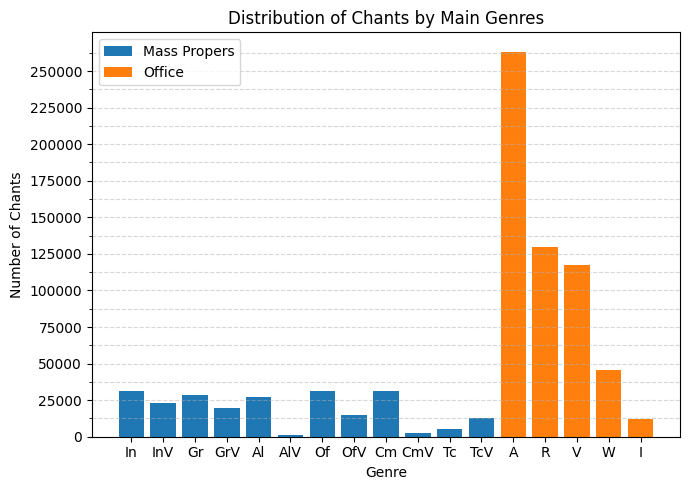

In [7]:
# Plot distribution of chants in selected main genres
GENRES_MASS_PROPERS = ['In', 'InV', 'Gr', 'GrV', 'Al', 'AlV', 'Of', 'OfV', 
                       'Cm', 'CmV', 'Tc', 'TcV']
GENRES_OFFICE = ['A', 'R', 'V', 'W', 'I']
MAIN_GENRES = GENRES_MASS_PROPERS + GENRES_OFFICE
genre_counts = chants['genre'].dropna().value_counts().loc[MAIN_GENRES].to_dict()

# Plot
plt.figure(figsize=(7, 5))
# Prepare colors and labels
colors = []
for genre in MAIN_GENRES:
    if genre in GENRES_MASS_PROPERS:
        colors.append('tab:blue')
    else:
        colors.append('tab:orange')

plt.bar(genre_counts.keys(), genre_counts.values(), color=colors)

plt.title('Distribution of Chants by Main Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Chants')
plt.xticks(rotation=0)

# Add more frequent gridlines
max_y = 252000
grid_interval = 12500
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.gca().set_yticks(
        np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='tab:blue', label='Mass Propers'),
    Patch(facecolor='tab:orange', label='Office')
]
plt.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

In [8]:
sorted_genre_counts = dict(sorted(genre_counts.items(), 
                                  key=lambda item: item[1], reverse=True))
for genre, count in sorted_genre_counts.items():
    print(genre, '\t:\t', count)

A 	:	 263294
R 	:	 129875
V 	:	 117394
W 	:	 45656
In 	:	 31551
Of 	:	 31251
Cm 	:	 31077
Gr 	:	 28841
Al 	:	 26842
InV 	:	 22771
GrV 	:	 19678
OfV 	:	 15018
TcV 	:	 12810
I 	:	 11978
Tc 	:	 5018
CmV 	:	 2466
AlV 	:	 936


-------

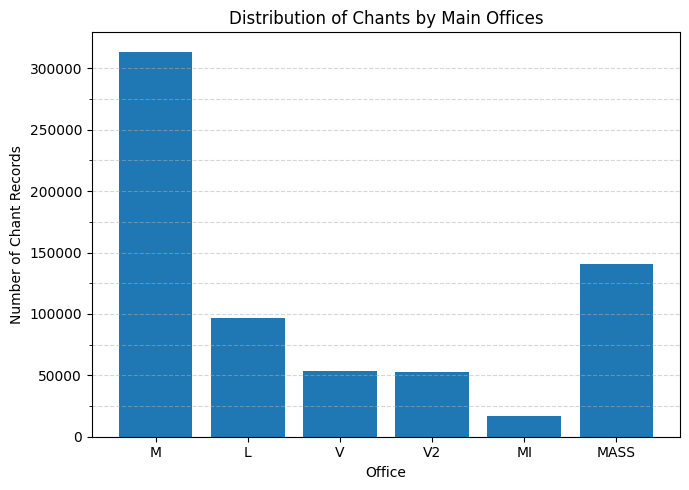

In [9]:
# Plot distrbution of chants in selected main offices
MAIN_OFFICES = ['M', 'L', 'V', 'V2', 'MI', 'MASS']
office_counts = chants['office'].value_counts().loc[MAIN_OFFICES].to_dict()

# Plot
plt.figure(figsize=(7, 5))
plt.bar(office_counts.keys(), office_counts.values(), color='tab:blue')

plt.title('Distribution of Chants by Main Offices')
plt.xlabel('Office')
plt.ylabel('Number of Chant Records')
plt.xticks(rotation=0)

# Add more frequent gridlines
max_y = 300000
grid_interval = 25000
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.gca().set_yticks(
        np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [10]:
sorted_office_counts = dict(sorted(office_counts.items(), key=lambda item: item[1], reverse=True))
for office, count in sorted_office_counts.items():
    print(office, '\t:\t', count)

M 	:	 313612
MASS 	:	 140779
L 	:	 96712
V 	:	 53616
V2 	:	 52418
MI 	:	 16512


------

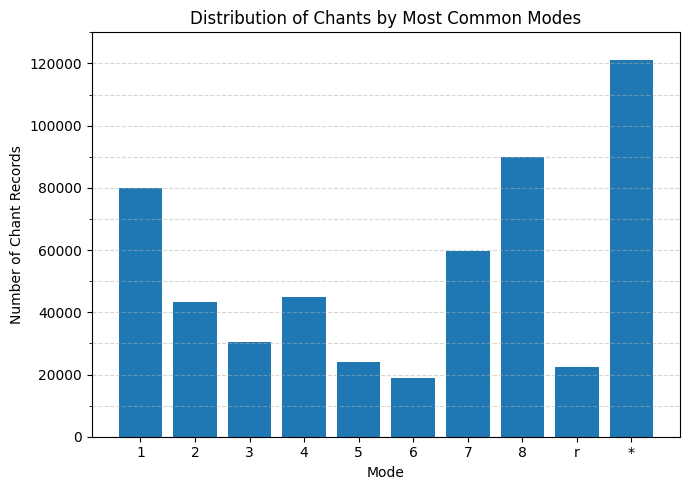

In [12]:
# Plot distribution of selected main modes
MAIN_MODES = ['1', '2', '3', '4', '5', '6', '7', '8', 'r', '*']
mode_counts = chants['mode'].value_counts().loc[MAIN_MODES].to_dict()

# Plot
plt.figure(figsize=(7, 5))
plt.bar(mode_counts.keys(), mode_counts.values(), color='tab:blue')

plt.title('Distribution of Chants by Most Common Modes')
plt.xlabel('Mode')
plt.ylabel('Number of Chant Records')
plt.xticks(rotation=0)

# Add more frequent gridlines
max_y = 125000
grid_interval = 10000
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.gca().set_yticks(
        np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [13]:
sorted_mode_counts = dict(sorted(mode_counts.items(), 
                                 key=lambda item: item[1], reverse=True))
for mode, count in sorted_mode_counts.items():
    print(mode, '\t:\t', count)

* 	:	 121266
8 	:	 89887
1 	:	 79855
7 	:	 59775
4 	:	 44861
2 	:	 43349
3 	:	 30372
5 	:	 23932
r 	:	 22350
6 	:	 18894


-------

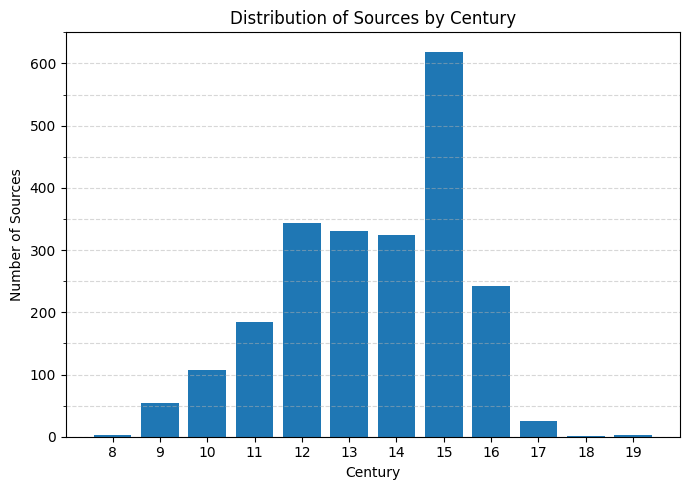

In [14]:
# Distribution of sources by century - use num_century column retyped to int
century_counts = (
    sources['num_century']
    .dropna()
    .astype(int)
    .value_counts()
    .sort_index()
)

# Plot
plt.figure(figsize=(7, 5))
plt.bar(century_counts.index.astype(str), century_counts.values, color='tab:blue')

plt.title('Distribution of Sources by Century')
plt.xlabel('Century')
plt.ylabel('Number of Sources')

max_y = century_counts.values.max()
grid_interval = 50
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(
        np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

In [15]:
for cent, count in zip(century_counts.index.astype(str), 
                       century_counts.values):
    print(cent, '\t:\t', count)

8 	:	 3
9 	:	 54
10 	:	 108
11 	:	 185
12 	:	 343
13 	:	 331
14 	:	 325
15 	:	 618
16 	:	 243
17 	:	 26
18 	:	 1
19 	:	 3


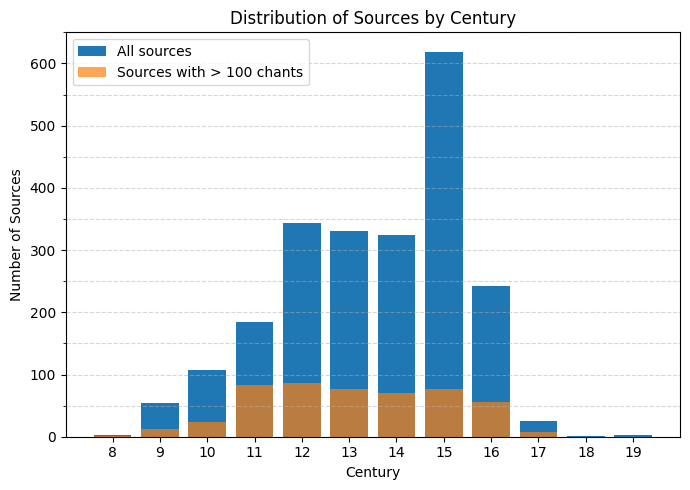

In [ ]:
# Distribution of sources by century with fragments filtered out- use num_century column retyped to int
century_counts = (
    sources['num_century']
    .dropna()
    .astype(int)
    .value_counts()
    .sort_index()
)

# Sources with more than 100 chants
frequent_srclinks = chants['srclink'].value_counts()
srclinks_to_keep = frequent_srclinks[frequent_srclinks > 100].index
sources_big = sources[sources['srclink'].isin(srclinks_to_keep)]

# Distribution of sources by century for sources with more than 100 chants - use num_century column retyped to int
century_counts_big = (
    sources_big['num_century']
    .dropna()
    .astype(int)
    .value_counts()
    .sort_index()
)

# Plot
plt.figure(figsize=(7, 5))
plt.bar(century_counts.index.astype(str), century_counts.values, color='tab:blue')
plt.bar(century_counts_big.index.astype(str), century_counts_big.values, 
        color='tab:orange', alpha=0.7)

plt.title('Distribution of Sources by Century')
plt.xlabel('Century')
plt.ylabel('Number of Sources')
plt.legend(['All sources', 'Sources with > 100 chants'])

max_y = century_counts.values.max()
grid_interval = 50
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(
        np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

------

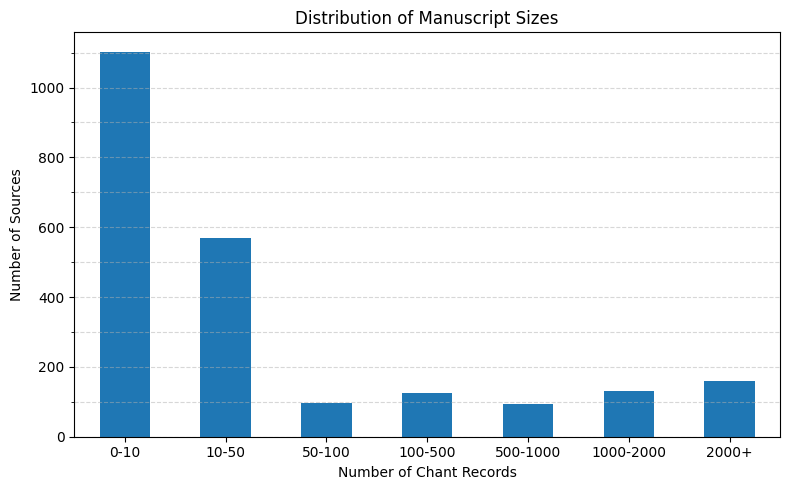

In [17]:
# Distribution of manuscript sizes - buckets
srclink_counts = chants['srclink'].value_counts()
bins = [0, 10, 50, 100, 500, 1000, 2000, float('inf')]
labels = ['0-10', '10-50', '50-100', '100-500', '500-1000', '1000-2000', '2000+']
binned = pd.cut(srclink_counts, bins=bins, labels=labels, right=False)
histogram = binned.value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
histogram.plot(kind='bar', color='tab:blue')

plt.title('Distribution of Manuscript Sizes')
plt.xlabel('Number of Chant Records')
plt.ylabel('Number of Sources')
plt.xticks(rotation=0)

max_y = 1100
grid_interval = 100
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(
        np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

-------

## Databases point of view

-------

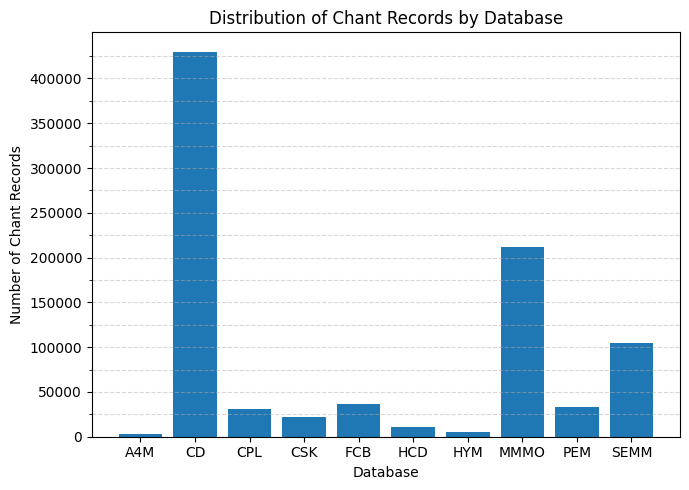

In [16]:
# Distribution of chant records by db
db_counts = (
    chants['db']
    .dropna()
    .value_counts()
    .sort_index()
)

# Plot
plt.figure(figsize=(7, 5))
plt.bar(db_counts.index.astype(str), db_counts.values, color='tab:blue')

plt.title('Distribution of Chant Records by Database')
plt.xlabel('Database')
plt.ylabel('Number of Chant Records')

max_y = 420000
grid_interval = 25000
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(
        np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

In [17]:
for db, count in zip(db_counts.index.astype(str), 
                       db_counts.values):
    print(db, '\t:\t', count)

A4M 	:	 2738
CD 	:	 429982
CPL 	:	 30433
CSK 	:	 22539
FCB 	:	 36103
HCD 	:	 11278
HYM 	:	 5290
MMMO 	:	 212231
PEM 	:	 32738
SEMM 	:	 104678


------

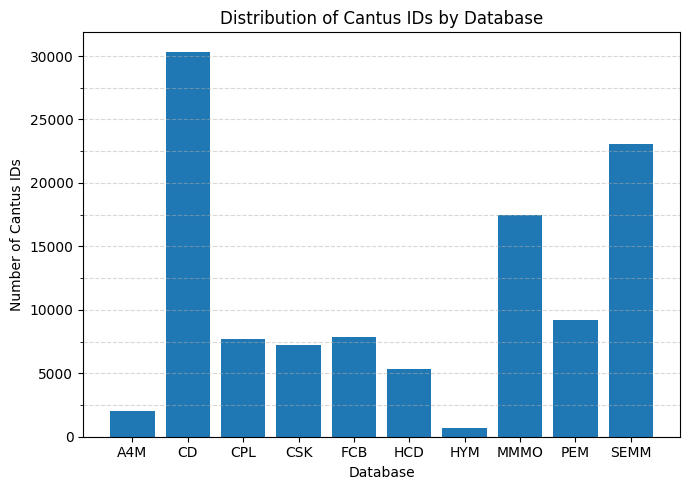

In [21]:
# Distribution of cantus_ids
cids_per_db = chants.groupby('db')['cantus_id'].nunique().to_dict()

# Plot
plt.figure(figsize=(7, 5))
plt.bar(cids_per_db.keys(), cids_per_db.values(), color='tab:blue')

plt.title('Distribution of Cantus IDs by Database')
plt.xlabel('Database')
plt.ylabel('Number of Cantus IDs')

max_y = 30000
grid_interval = 2500
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2))
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(
        np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

In [22]:
sorted_cid_db_counts = dict(sorted(cids_per_db.items(), key=lambda item: item[1], reverse=True))
for db, count in sorted_cid_db_counts.items():
    print(db, '\t:\t', count)

CD 	:	 30350
SEMM 	:	 23103
MMMO 	:	 17479
PEM 	:	 9184
FCB 	:	 7889
CPL 	:	 7666
CSK 	:	 7201
HCD 	:	 5374
A4M 	:	 2006
HYM 	:	 680


-------

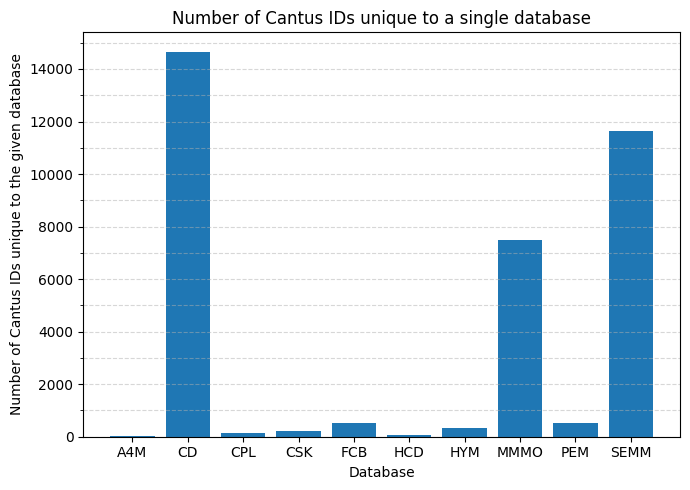

In [23]:
# Distribution of CIDs unique for given db in the ecosystem
db_groups = chants.groupby('db')['cantus_id'].apply(set)

unique_counts = {}
for db, ids in db_groups.items():
    other_ids = set().union(
        *(db_groups[other_db] for other_db in db_groups.index if other_db != db))
    unique_to_db = ids - other_ids
    unique_counts[db] = len(unique_to_db)

# Plot
plt.figure(figsize=(7, 5))
plt.bar(unique_counts.keys(), unique_counts.values(), color='tab:blue')

plt.title('Number of Cantus IDs unique to a single database')
plt.xlabel('Database')
plt.ylabel('Number of Cantus IDs unique to the given database')

max_y = 15000
grid_interval = 1000
plt.yticks(np.arange(0, max_y + grid_interval, step=grid_interval * 2)) 
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.gca().set_yticks(
    np.arange(0, max_y + grid_interval, step=grid_interval), minor=True)

plt.tight_layout()
plt.show()

--------------------------------------

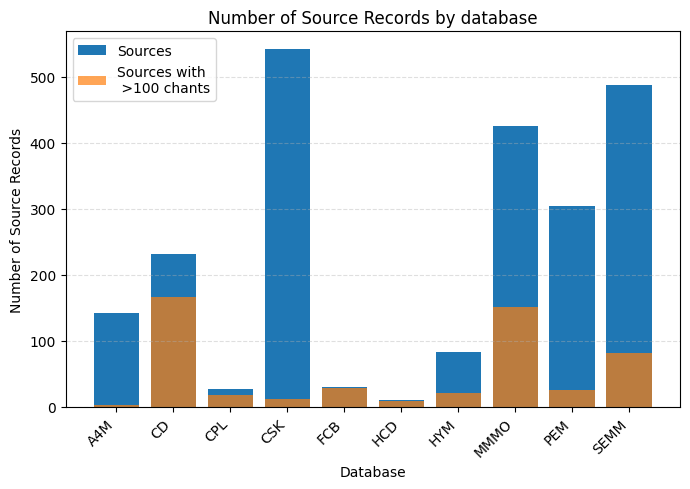

In [27]:
# Overlapping bars: Source records and Sources with >100 chants
# Recompute metrics (safe to run independently of earlier cells)
srclinks_per_db = chants.groupby('db')['srclink'].nunique().sort_index()
frequent_srclinks = chants['srclink'].value_counts()
srclinks_to_keep = frequent_srclinks[frequent_srclinks > 100].index
filtered_chants = chants[chants['srclink'].isin(srclinks_to_keep)]
srclinks_per_db_big = filtered_chants.groupby('db')['srclink'].nunique()
# Align indices and ensure integer counts
index = srclinks_per_db.index.astype(str)
small = srclinks_per_db.reindex(index).fillna(0).astype(int)
big = srclinks_per_db_big.reindex(index).fillna(0).astype(int)
# Plot overlapping bars at same x positions (use alpha for visibility)
x = np.arange(len(index))
plt.figure(figsize=(7, 5))
plt.bar(x, small.values, color='tab:blue', label='Sources')
plt.bar(x, big.values, color='tab:orange', alpha=0.7, label='Sources with \n >100 chants')
plt.xticks(x, index, rotation=45, ha='right')
plt.title('Number of Source Records by database')
plt.xlabel('Database')
plt.ylabel('Number of Source Records')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()